In [21]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import math

In [181]:
# load original experimental data
exp = np.loadtxt("2_hd_wave3_filtered.txt", comments="#", delimiter=",", unpack=False)

In [182]:
# select and cut the window for the wave elevation at the first wave gauge
ns = 601
nf = 1201
idx=0
new = np.zeros((nf-ns))
for i in range(ns,nf):
    new[idx] = exp[i]/100
    idx=idx+1

In [183]:
zero_crossings = np.where(np.diff(np.sign(new)))[0]
peaks = np.zeros(len(zero_crossings)-1)
peak_idx = np.zeros(len(zero_crossings)-1)
for i in range(len(zero_crossings)-1):
    first=zero_crossings[i]
    second=zero_crossings[i+1]
    values = np.zeros(second-first+1)
    x=0
    for idx in range(first,second+1):
        values[x]=new[idx]
        if x!=second-1:
            x=x+1
        else:
            pass
    if new[first]>0:
        peaks[i]=np.min(values)
        peak_idx[i]=np.argmin(values)+first
    elif new[first]<0:    
        peaks[i]=np.max(values)
        peak_idx[i]=np.argmax(values)+first

eta=np.zeros(len(peaks))
for i in range(len(peaks)):
    eta[i]=abs(peaks[i])*2

order=np.sort(eta)
#plt.figure(1, figsize=(10,6), dpi=100)
#psize=12
#plt.plot(order)
#plt.show()
    
Hs=np.mean(np.sort(eta)[len(eta)-math.ceil(len(eta)/3):])
print(Hs)

0.019487906667986905


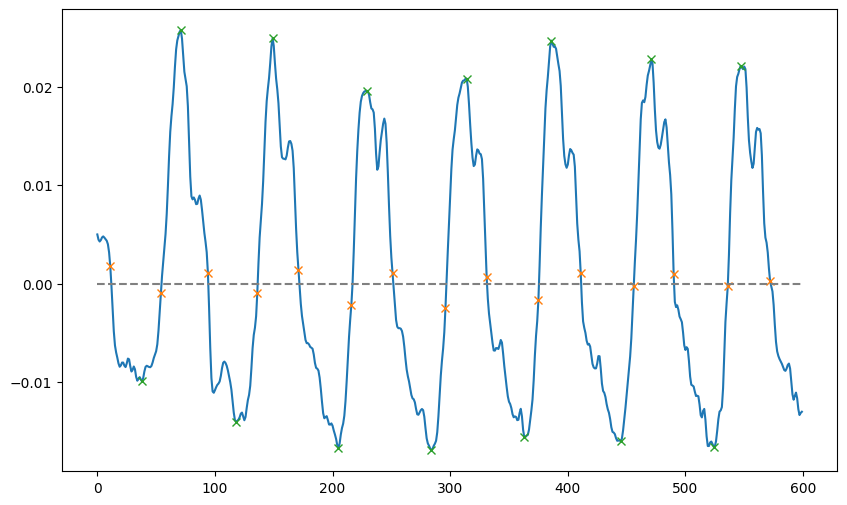

In [156]:
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(new)
plt.plot(zero_crossings, new[zero_crossings],"x")
plt.plot(peak_idx,peaks,'x')
plt.plot(np.zeros_like(new), "--", color="gray")
plt.show()